In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dogs = pd.read_csv('../projekt_utulky/fixed_data_shelter_dogs.csv',delimiter=';')
data_dogs.head()

,id,name,status,gender,age,size,breed,cross_breed,childrenFriend,catFriend,...,activeFriend,color,tattoo,neutered,handicap,find_location,region,find_date,actual_location,detailed_description
0,8,Ferda,NaN,Pes,17 let,Střední (31 - 60 cm),Československý vlčák,Kříženec,Unknown,Unknown,...,Unknown,Hnědá,Ne,Ne,Ne,"Rokytnice, sídliště Vltava",NaN,01.08.2013,NaN,Fotogalerie EOL Přijďte vyvenčit tohoto pejska...
1,23,Máca,NaN,Fena,12 let,Střední (31 - 60 cm),Bílý švýcarský ovčák,NaN,Unknown,Unknown,...,Unknown,NaN,Ne,Ne,Ne,NaN,NaN,NaN,NaN,NaN
2,51,Kelly,vrácen majiteli,Pes,17 let,Malá (do 30 cm),Aljašský malamut,Kříženec,Unknown,Unknown,...,Unknown,Černá,Ano,Ne,Ano,NaN,NaN,NaN,NaN,NaN
3,55,Amálka,vrácena majiteli,Fena,14 let,Střední (31 - 60 cm),Belgický ovčák - Tervueren,Kříženec,Unknown,Unknown,...,Unknown,Hnědá,Ne,Ne,Ne,NaN,NaN,NaN,NaN,NaN
4,64,Spit,našel domov,Pes,17 let,Střední (31-60 cm),Rotvajler,Kříženec,ano,ne,...,ne,Černá,Ne,Ne,Ne,NaN,NaN,NaN,Zájmový záchranný chov Hněvice - činnost ukončena,18.8.2014 NAŠEL DOMOV V DUŠNÍKÁCH U ROUDNICE N...


In [3]:
status_pocet = data_dogs['status'].value_counts(dropna=False)
status_pocet


status
našel domov         26067
našla domov         18291
vrácen majiteli      1672
NaN                  1119
vrácena majiteli      784
                    ...  
Ziwa                    1
Zafira                  1
Zira                    1
Annie                   1
sterilizovaná           1
Name: count, Length: 181, dtype: int64

In [4]:
combined_status = data_dogs['status'].replace({
    'našel domov': 'našel domov',
    'našla domov': 'našel domov',
    'vrácen majiteli': 'vrácen majiteli',
    'vrácena majiteli': 'vrácen majiteli',
    'zemřel': 'zemřel',
    'zemřela': 'zemřel'
}).fillna('Neuvedeno')

combined_status = combined_status.where(
    combined_status.isin(['našel domov', 'vrácen majiteli', 'zemřel']),
    'Neuvedeno'
)

final_status_counts = combined_status.value_counts()

final_status_counts


status
našel domov        44358
vrácen majiteli     2456
Neuvedeno           1338
zemřel               755
Name: count, dtype: int64

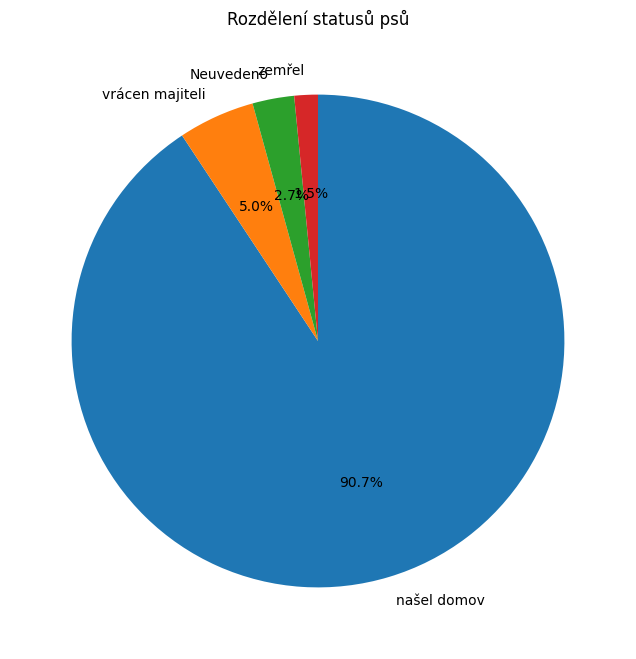

In [5]:
plt.figure(figsize=(8, 8))
final_status_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False, 
    labels=final_status_counts.index
)

plt.title("Rozdělení statusů psů")
plt.ylabel("")
plt.show()
